# Simulations with random numbers 

In [84]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats 

## Shonkwiler Exercise 8
Random walk with drift: Use a biased coin to simulate a random walk of 30 steps on the line. If the coin falls heads (H), take one step to the right, if it lands tails (T), take one step left. 
After 30 steps, note the final position. Take Pr(H)=0.6 and Pr(T )=0.4. 
- Plot a sample path.
- Make a histogram for 200 such random walks. 
- Report the sample mean. 
- Report the sample variance. (What should these be exactly?)

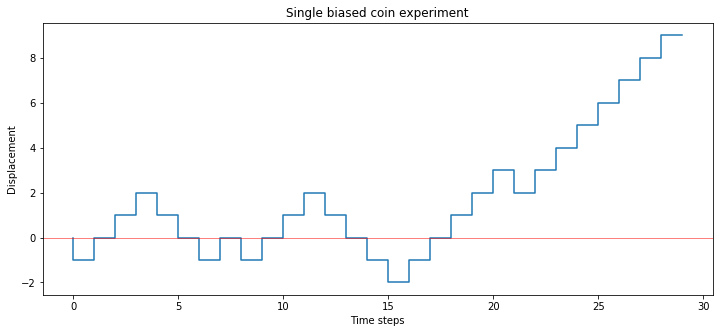

In [67]:
def RandomWalk(steps, bias):
    pos = [0]
    for step in range(steps-1):
        if np.random.random() < bias: pos.append(pos[-1]+1)
        else: pos.append(pos[-1]-1)
    return pos

plt.figure(figsize=(12, 5))
plt.step(range(30), RandomWalk(30, .6))
plt.axhline(0, color='red', linewidth=.5)
plt.title('Single biased coin experiment')
plt.xlabel('Time steps')
plt.ylabel('Displacement')
plt.show()

Expected Mean:  5.999999999999998 
Sample Mean:    5.47 

Expected Variance:  19.12000000000002 
Sample Variance:    25.1991


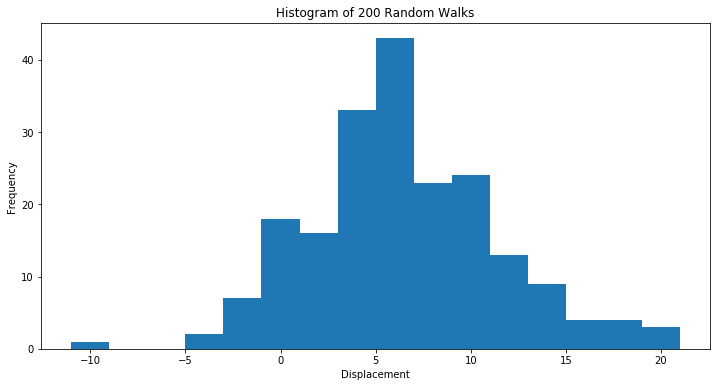

In [79]:
Walks = []
for walk in range(200):
    Walks.append(RandomWalk(30, .6)[-1])


print("Expected Mean: ", (.6 - .4) * 30, 
    "\nSample Mean:   ", np.mean(Walks),
    "\n\nExpected Variance: ", np.average(np.square(Walks)) - np.square(mean_exp),
    "\nSample Variance:   ", np.var(Walks))

plt.figure(figsize=(12,6))
plt.title("Histogram of 200 Random Walks")
plt.xlabel("Displacement")
plt.ylabel("Frequency")
plt.hist(Walks, bins='auto')
plt.show()

## Shonkwiler Exercise 9
Gambler's ruin with time limits: Modify the simulation code in Section 1.1.3 starting on page 8 for the gambler's ruin problem, but with various upper bounds on the iteration count. How does this bias the average duration of the game? How does this bias the sample variance?

DescribeResult(nobs=100, minmax=(100, 100), mean=100.0, variance=0.0, skewness=0.0, kurtosis=-3.0)


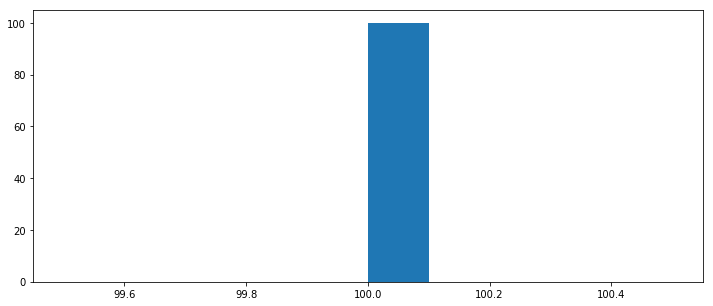

DescribeResult(nobs=100, minmax=(1000, 1000), mean=1000.0, variance=0.0, skewness=0.0, kurtosis=-3.0)


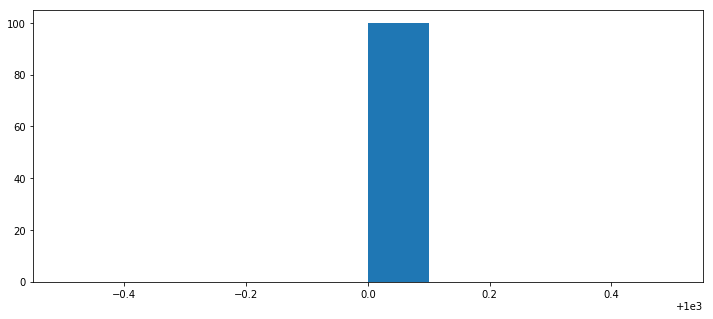

DescribeResult(nobs=100, minmax=(1258, 10000), mean=8501.64, variance=6756741.202424242, skewness=-1.518721498936308, kurtosis=0.8940589486144859)


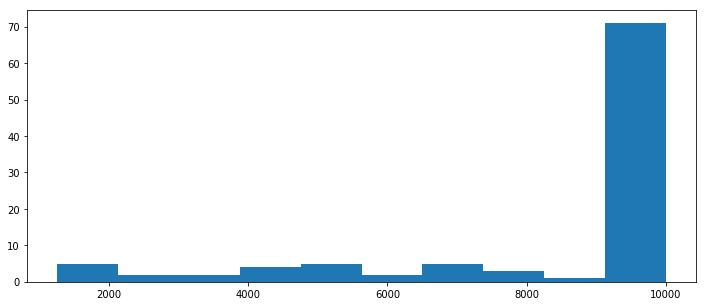

DescribeResult(nobs=100, minmax=(1740, 100000), mean=39743.42, variance=1567585743.4581814, skewness=0.767266598855802, kurtosis=-1.238761335117081)


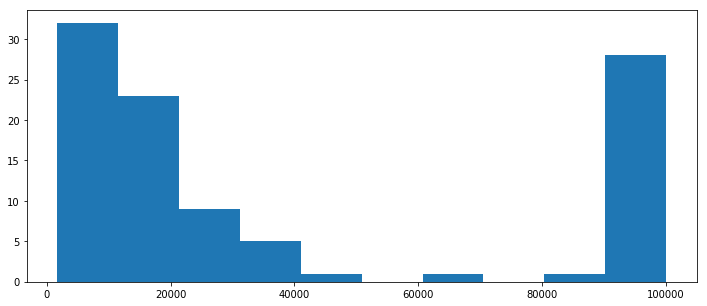

DescribeResult(nobs=100, minmax=(1590, 1000000), mean=128791.08, variance=63298183229.5289, skewness=2.519559689242366, kurtosis=5.363849062767866)


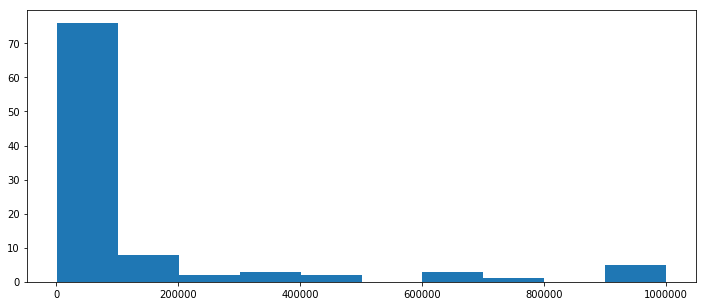

DescribeResult(nobs=100, minmax=(582, 3062582), mean=241749.9, variance=379222069521.24243, skewness=3.449603596949063, kurtosis=10.984689634917554)


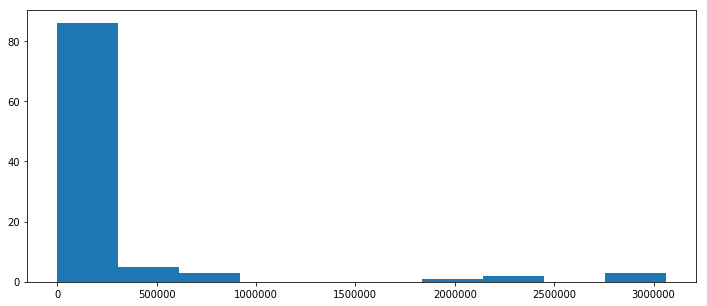

In [102]:
def gamblers_ruin(limit = None):
    n, gambler, house = 0, 100, 2000
    while gambler > 0 and house > 0 and (not limit or n < limit):
        gambler, house = (gambler + 1, house - 1) if np.random.random() < .5 else (gambler - 1, house + 1)
        n += 1
    return n

for i in np.logspace(2, 7, num=7-2+1, base=10, dtype = 'int'):
    x = [gamblers_ruin(i) for _ in range(100)]
    print(scipy.stats.describe(x))
    plt.figure(figsize=(12, 5))
    plt.hist(x)
    plt.show()